<a href="https://colab.research.google.com/github/kinanpermata/PCVK-Genap-20-21/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


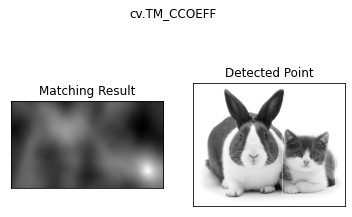

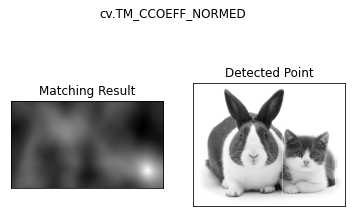

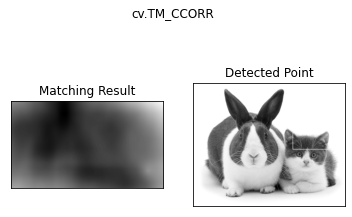

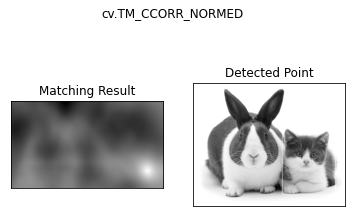

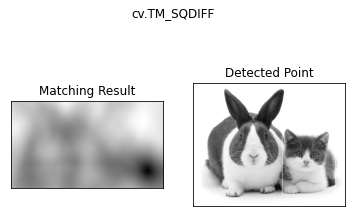

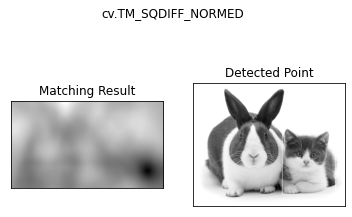

In [4]:
img = cv.imread('/content/drive/MyDrive/PVCK/cats_and_bunnies.jpg',0)
img2 = img.copy()

template = cv.imread('/content/drive/MyDrive/PVCK/cat2_templatejpg.jpg',0)
w, h = template.shape[::-1]

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

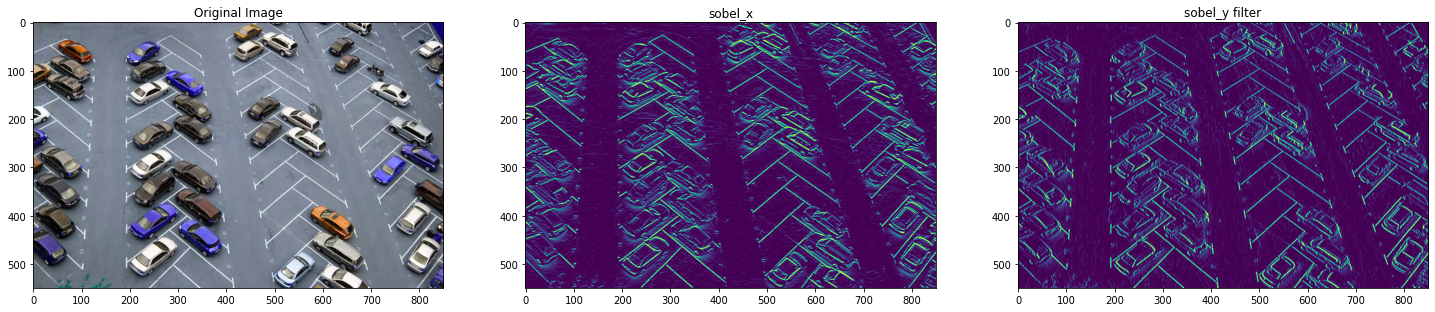

In [5]:
#Sobel Edge Detection

image_original = cv.imread('/content/drive/MyDrive/PVCK/parking-lot-cars.jpg', cv.IMREAD_COLOR)

# Convert image to gray scale
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)

# 3x3 Y-direction  kernel
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# 3 X 3 X-direction kernel
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image_y = cv.filter2D(image_gray, -1, sobel_y)
filtered_image_x = cv.filter2D(image_gray, -1, sobel_x)

(fig, (ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(25, 25))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('sobel_x')
ax2.imshow(filtered_image_y)
ax3.title.set_text('sobel_y filter')
ax3.imshow(filtered_image_x)

plt.show()

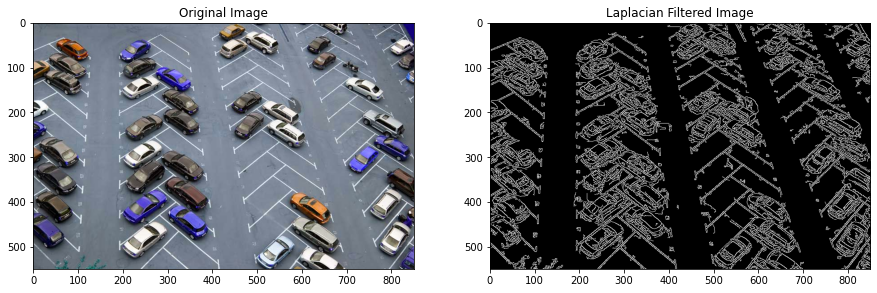

In [7]:
#Canny Edge Detection

image_original = cv.imread('/content/drive/MyDrive/PVCK/parking-lot-cars.jpg', cv.IMREAD_COLOR)

# remove noise
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)
filtered_image = cv.Canny(image_gray, threshold1=20, threshold2=200)

# Plot outputs
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

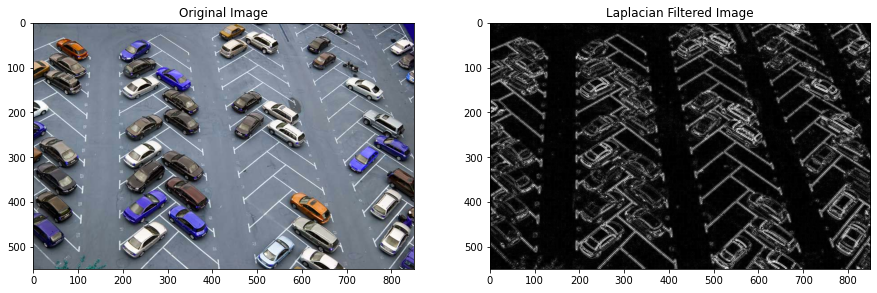

In [9]:
#Laplacian Edge Detection

image_original = cv.imread('/content/drive/MyDrive/PVCK/parking-lot-cars.jpg', cv.IMREAD_COLOR)

# remove noise
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)

# Reduce noise in image
img = cv.GaussianBlur(image_gray,(3,3),0)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)

# converting back to uint8
filtered_image = cv.convertScaleAbs(filtered_image)

# Plot outputs
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

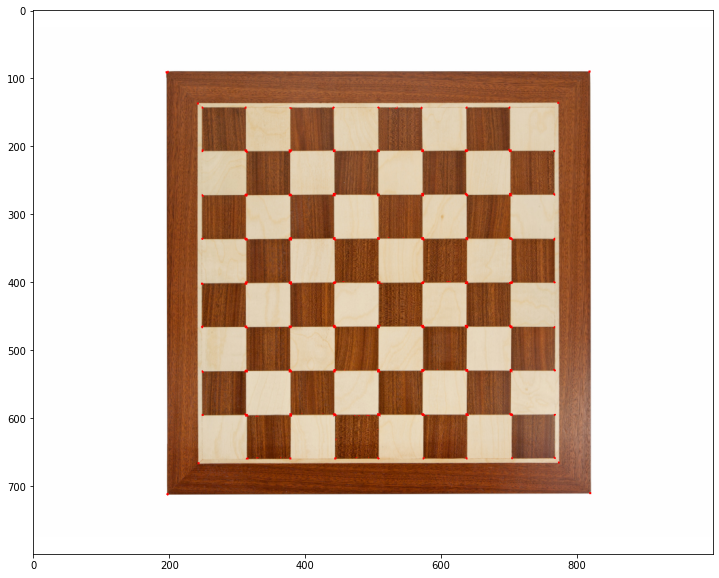

In [10]:
#Harris Corner Detection

#load citra input 
input_img = cv.imread('/content/drive/MyDrive/PVCK/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img) 
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut 
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai 
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

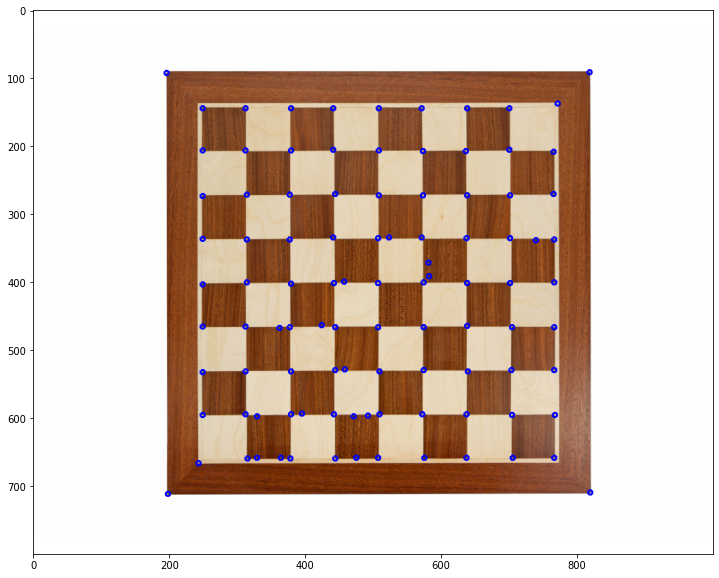

In [11]:
#Shi-Tomasi Detection

input_img = cv.imread('/content/drive/MyDrive/PVCK/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10) 
corners = np. int0(corners) 
for i in corners:
    x,y = i.ravel() 
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

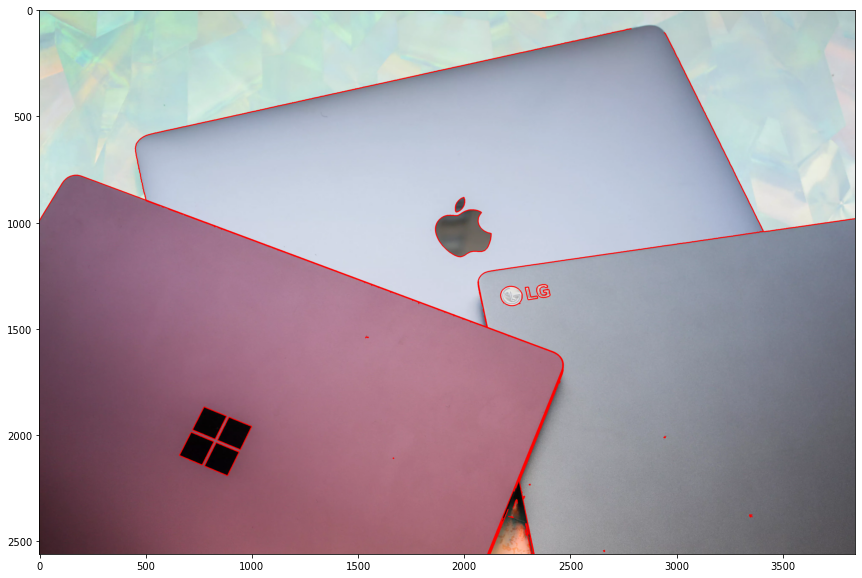

In [12]:
#Countour Detection

img = cv.imread('/content/drive/MyDrive/PVCK/laptop.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))